< 선형회귀분석 복습 > with 경사하강법 (Moore-Penrose 사용X)

- 경사하강법 알고리즘을 이용하여 선형모델이 아닌 모델에서도 사용가능함
- 일반적인 기계학습의 최적화

< 경사하강법으로 선형회귀 계수 구하기 >

- 선형회귀의 목적식은 ||y-Xβ||_2 이고, 이를 최소화하는 β를 찾아야 함
- nabla_β(||y-Xβ||_2) : gradient 벡터를 구해야함

- 목적식을 β로 미분(β의 각 원소로 편미분) -> 주어진 β에서 미분값을 빼줌 
- n개의 데이터를 가지고 사용되는 L2-norm이므로 일반 L2-norm과는 달리 제곱값을 다 더해준 뒤 n으로 나누고 루트를 씌워줌

< 알고리즘 >

norm : L2-norm을 계산하는 함수
lr : 학습률, T : 학습함수

for t in range(T) :
    error = y - x @ beta
    grad = - transpose(X) @ error 
    beta -= lr * grad

- 이제 경사하강법 알고리즘으로 역행렬을 이용하지 않고 회귀계수를 계산할 수 있음
- 경사하강법 알고리즘에서는 학습률과 학습횟수가 중요한 hyperparameter가 된다

< 경사하강법은 만능인가? >

- 이론적으로 경사하강법은 미분가능하고 볼록(convex)한 함수에 대해선 적절한 학습률과 학습횟수를 선택했을 때 수렴이 보장되어 있음

- 특히 선형회귀의 경우 목적식 ∥y − Xβ∥2 은 회귀계수 β 에 대해 볼록함 수이기 때문에 알고리즘을 충분히 돌리면 수렴이 보장됨  

- 하지만 비선형회귀 문제의 경우 목적식이 볼록하지 않을 수 있으므로 수렴 이 항상 보장되지는 않음




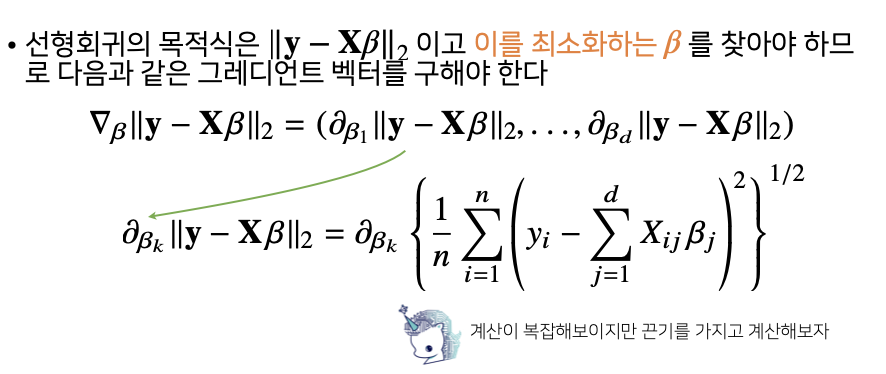

In [21]:
from IPython.display import Image

Image("/Users/eric/Documents/AI/AI Basic 2023/Course Materials/week 3/1.png")


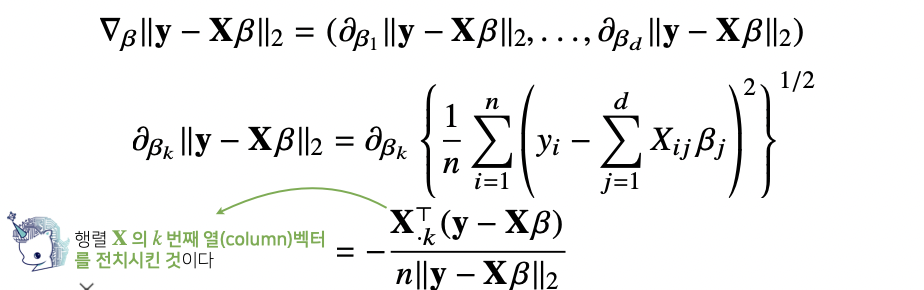

In [22]:
Image("/Users/eric/Documents/AI/AI Basic 2023/Course Materials/week 3/2.png")


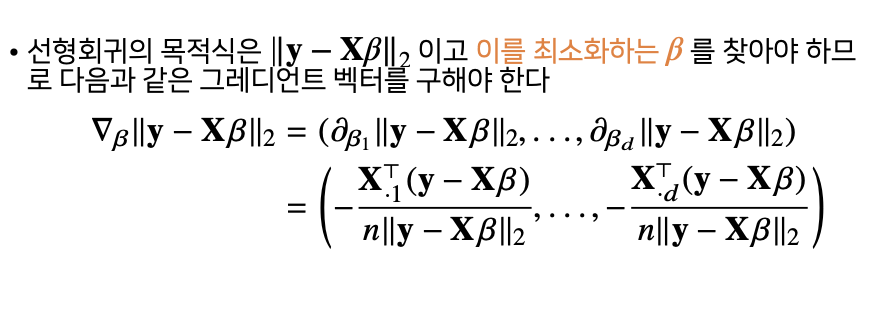

In [23]:
Image("/Users/eric/Documents/AI/AI Basic 2023/Course Materials/week 3/3.png")


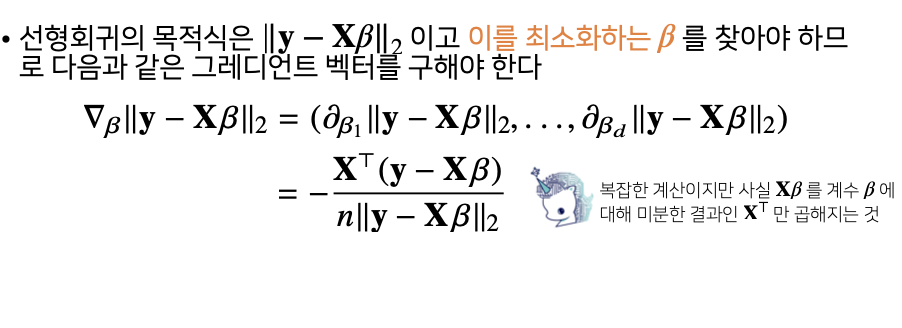

In [24]:
Image("/Users/eric/Documents/AI/AI Basic 2023/Course Materials/week 3/4.png")


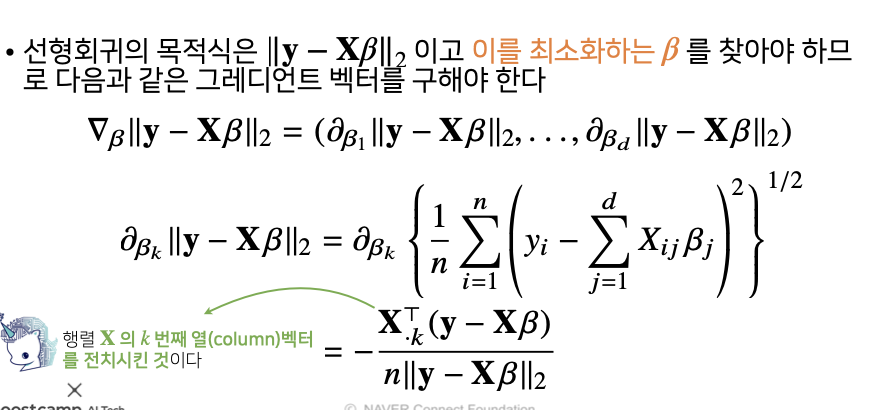

In [25]:
Image("/Users/eric/Documents/AI/AI Basic 2023/Course Materials/week 3/5.png")


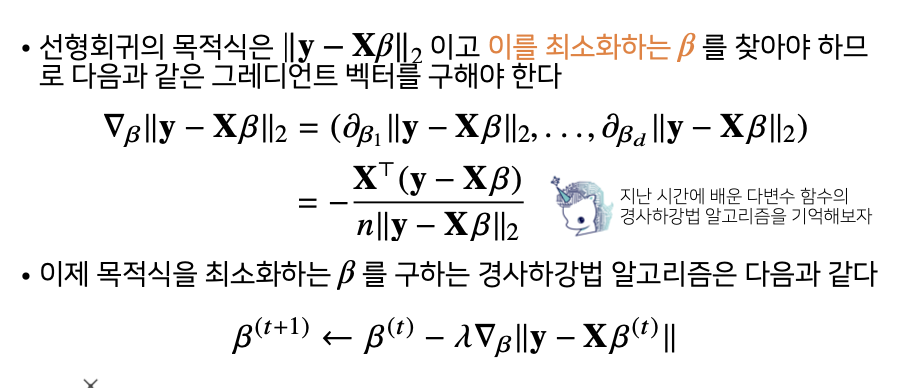

In [26]:
Image("/Users/eric/Documents/AI/AI Basic 2023/Course Materials/week 3/6.png")


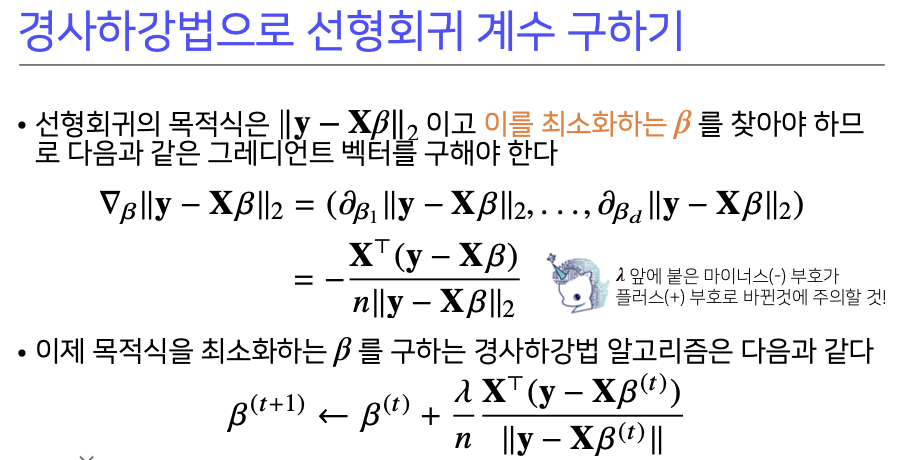

In [27]:
Image("/Users/eric/Documents/AI/AI Basic 2023/Course Materials/week 3/7.png")

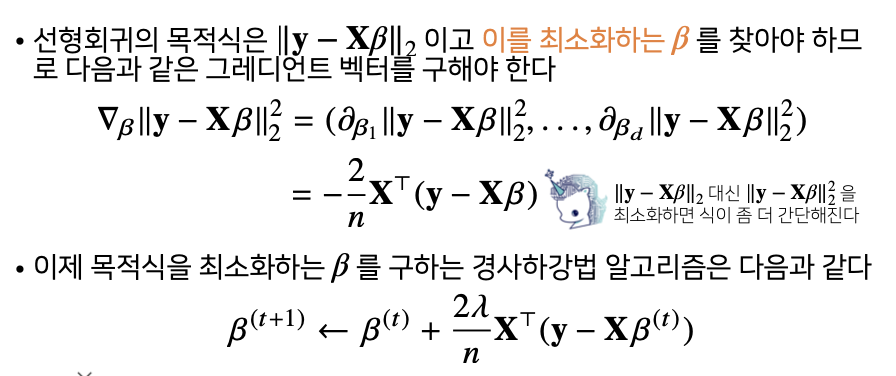

In [28]:
Image("/Users/eric/Documents/AI/AI Basic 2023/Course Materials/week 3/8.png")


In [32]:
import numpy as np

X = np.array([[1,1],[1,2],[2,2],[2,3]])
Y = np.dot(X, np.array([1,2])) + 3

beta_gd = [10.1, 15.1, -6.5]
X_ = np.array([np.append(x,[1]) for x in X])  # intercept항 추가

for t in range(5000) : 
    error = Y - X_ @ beta_gd
    # error = error / np.linalg.norm(error)
    grad = -np.transpose(X_) @ error
    beta_gd = beta_gd - grad * 0.01 # 학습률 0.01
    
print(beta_gd)
    

[1.00000367 1.99999949 2.99999516]


< 확률적 경사하강법 >

- 확률적 경사하강법(stochastic gradient descent): 데이터 한 개 활용하여 업데이트
- 확률적 경사하강법(mini batch stochastic gradient descent): 데이터 일부 활용하여  업데이트
-> 정확한 gradient vector는 아니더라도 연산자원을 효율적으로 활용할 수 있음 & 실제 gradient vector와 유사한 역할

- 일반적 경사하강법(gradient descent): 모든 데이터를 사용해서 업데이트 

- 볼록이 아닌(non-convex) 목적식은 SGD를 통해 최적화할 수 있습니다
- SGD 라고 해서 만능은 아니지만 딥러닝의 경우 SGD 가 경사하강법보다 실증적으로 더 낫다고 검증되었다


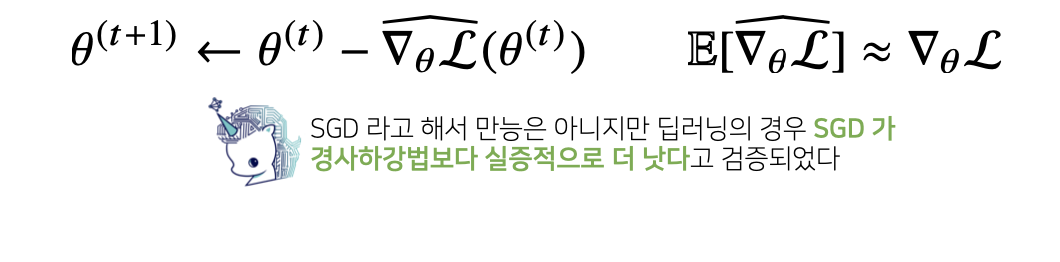

In [34]:
Image("/Users/eric/Documents/AI/AI Basic 2023/Course Materials/week 3/10.png")


- SGD 는 데이터의 일부를 가지고 패러미터를 업데이트하기 때문에 연산자원 을 좀 더 효율적으로 활용하는데 도움이 됨

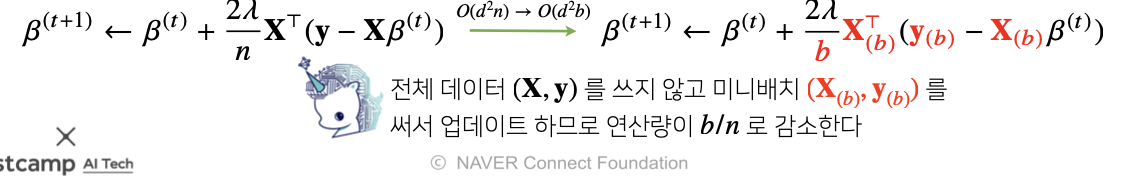

In [35]:
Image("/Users/eric/Documents/AI/AI Basic 2023/Course Materials/week 3/11.png")


< mini batch 연산 >

- 경사하강법은 전체데이터 𝒟 = (X, y) 를 가지고 목적식의 그레디언트 벡터 인 ∇θL(𝒟,θ) 계산

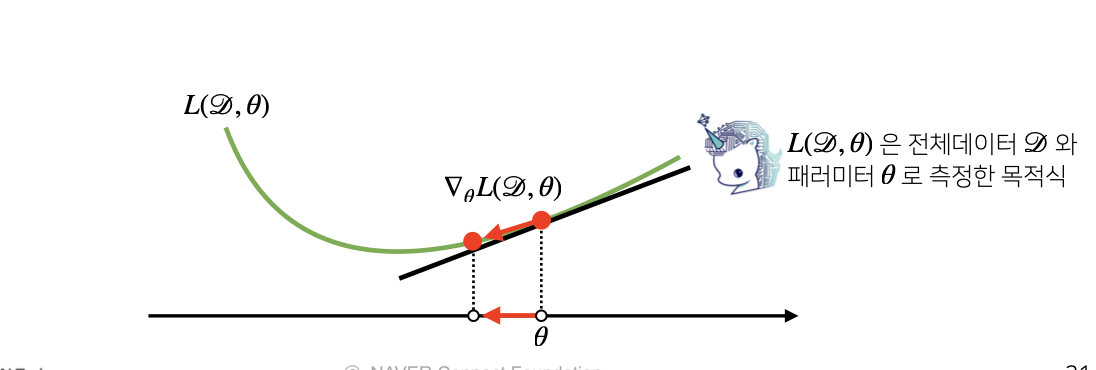

In [36]:
Image("/Users/eric/Documents/AI/AI Basic 2023/Course Materials/week 3/12.png")


- SGD 는 미니배치 𝒟(b) = (X(b), y(b)) ⊂ 𝒟 를 가지고 그레디언트 벡터를 계산
- 일부 데이터를 가지고 계산하므로 gradient vector의 방향과 같지 않지만 유사하게 이동

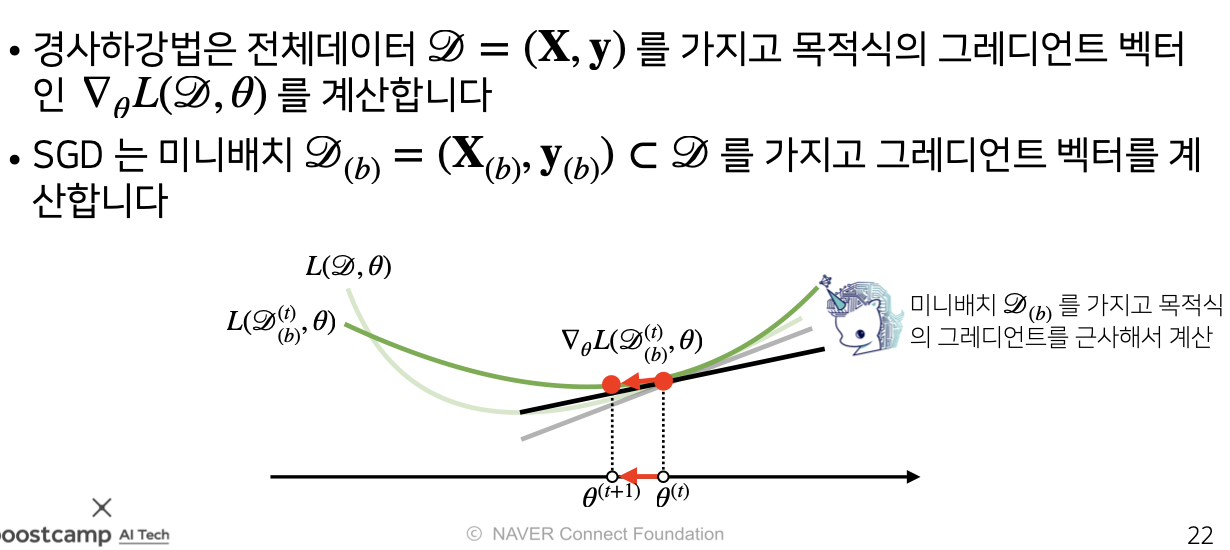

In [37]:
Image("/Users/eric/Documents/AI/AI Basic 2023/Course Materials/week 3/13.png")


- SGD 는 미니배치 𝒟(b) = (X(b), y(b)) ⊂ 𝒟 를 가지고 그레디언트 벡터를 계 산합니다. 미니배치는 확률적으로 선택하므로 목적식 모양이 바뀌게 됩니다

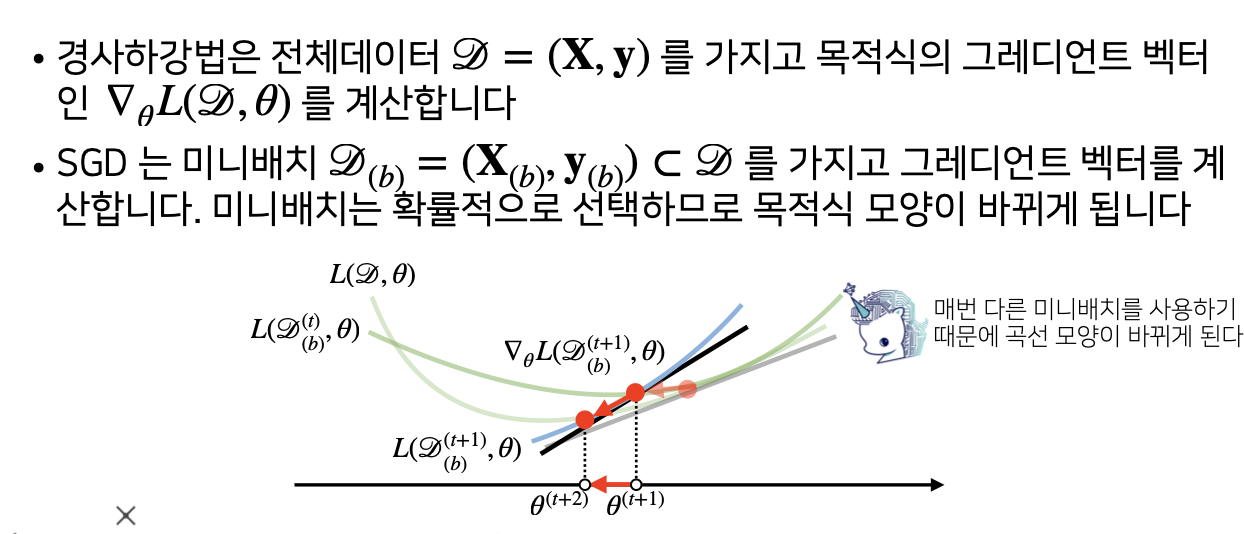

In [38]:
Image("/Users/eric/Documents/AI/AI Basic 2023/Course Materials/week 3/14.png")


- SGD 는 볼록이 아닌 목적식에서도 사용 가능하므로 경사하강법보다 머신러닝 학습에 더 효율적입니다
- 학습률, 학습횟수, 미니배치 사이즈 모두 고려해야함

- 만일 일반적인 경사하강법처럼 모든 데이터를 업로드하면 메모리가 부족하여 Out-of-memory 가 발생한다
- GPU 에서 행렬 연산과 모델 패러미터를 업데이트하는 동안 CPU 는 전처리와 GPU 에서 업로드할 데이터를 준비한다